In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

import seaborn as sns
import re

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances , euclidean_distances

In [2]:
df = pd.read_csv('book_text_matrix.csv')
df = df.set_index('book_id')
print(df.shape)

(285, 1314)


In [3]:
titles = dict()

path = 'texts_in_books.json'
json_file = open(path)
json_data = json.load(json_file)

for book in json_data:
    titles[ book['id'] ] = book['title']
    

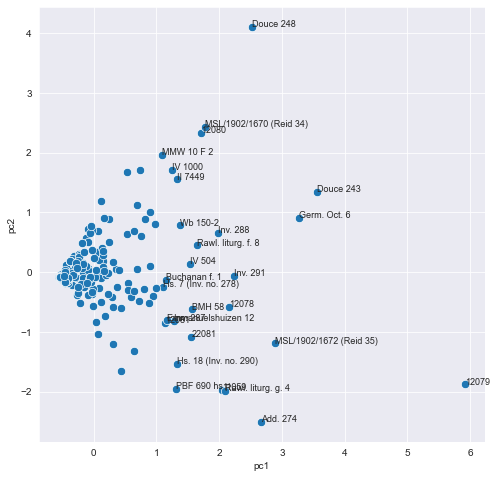

In [4]:

sns.set_style("darkgrid")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pc_df = pd.DataFrame(data = principal_components , columns = ['pc1', 'pc2'])


plt.figure(figsize = (8,8))
sns.scatterplot( data = pc_df , x = 'pc1', y = 'pc2' , s = 70  )

for i, row in pc_df.iterrows():
    if row['pc1'] > 1:
        plt.text( row['pc1']  , row['pc2']  , titles[df.index[i]] , size = 9) 

plt.savefig('pca_similarity.png',dpi=300)

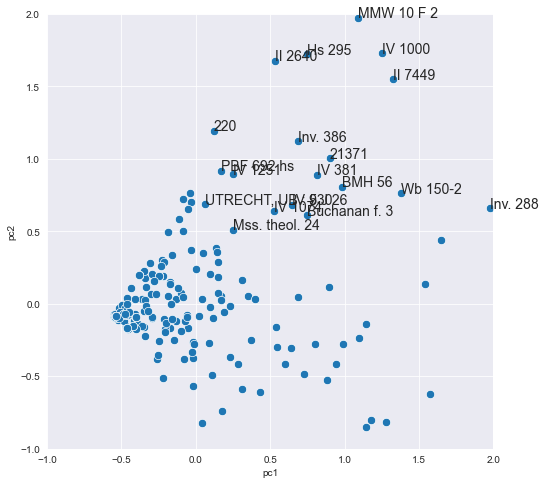

In [5]:

sns.set_style("darkgrid")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pc_df = pd.DataFrame(data = principal_components , columns = ['pc1', 'pc2'])


plt.figure(figsize = (8,8))
sns.scatterplot( data = pc_df , x = 'pc1', y = 'pc2' , s = 70  )

plt.ylim(-1, 2)
plt.xlim(-1,2)

for i, row in pc_df.iterrows():
    if (0 < row['pc1'] < 2) and (0.5 < row['pc2'] < 2):
        plt.text( row['pc1']  , row['pc2']  , titles[df.index[i]] , size = 14) 


plt.show()


In [6]:
titles_list = []

for book_id in df.index:
    titles_list.append(titles[book_id])

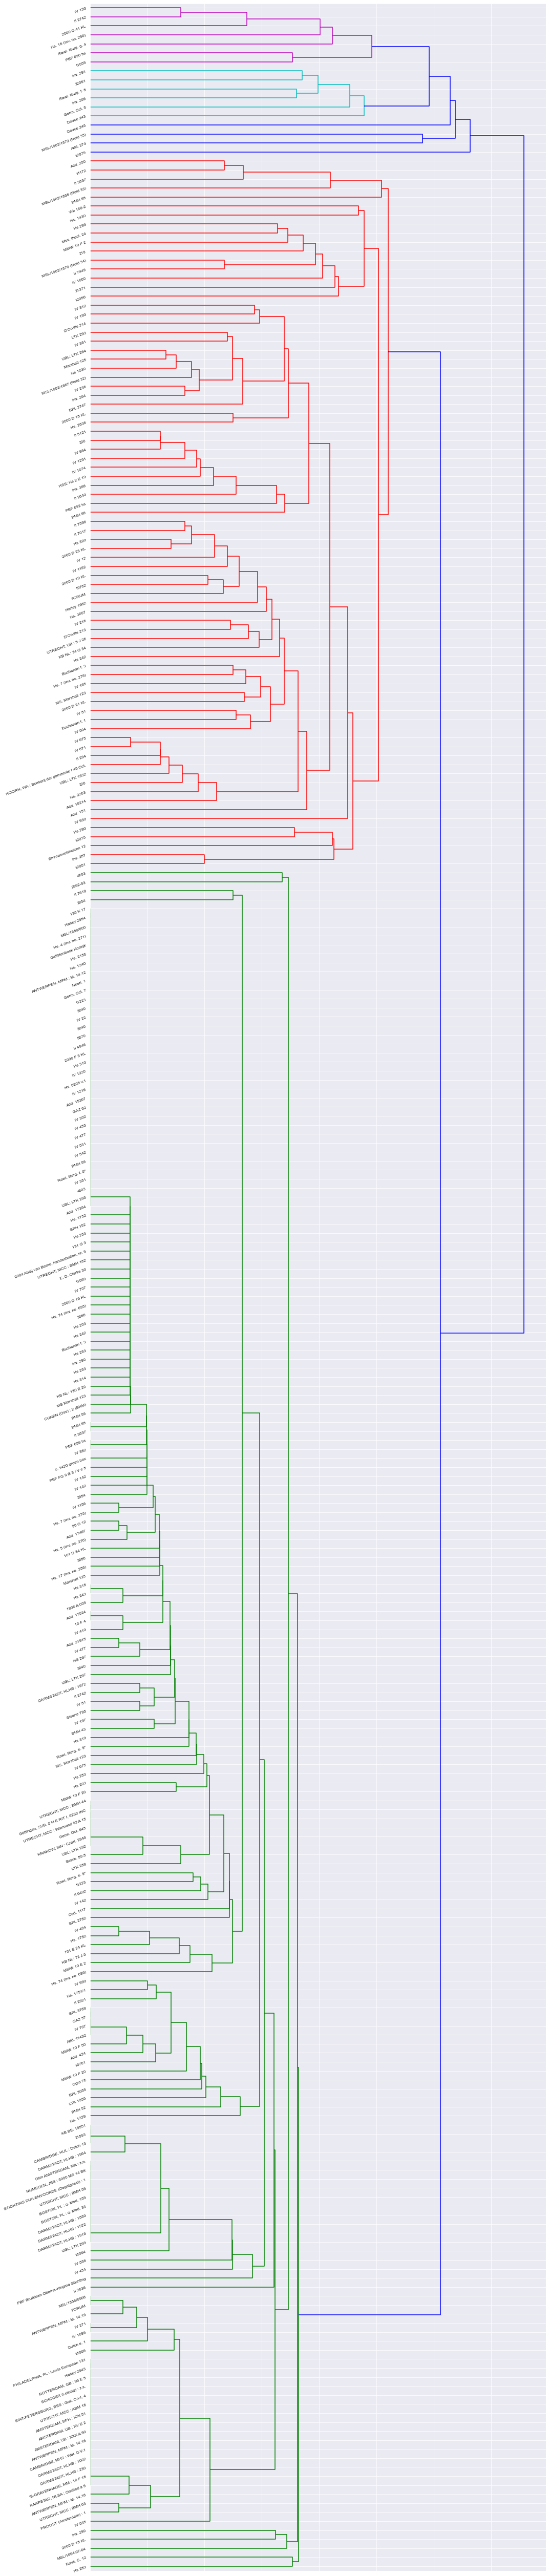

In [7]:

plt.figure(figsize = (15,70))

from scipy.cluster.hierarchy import linkage, dendrogram
linkages = linkage(df,'ward')

import matplotlib.pyplot as plt
dendrogram( linkages , labels = titles_list , orientation="right", leaf_font_size=8, leaf_rotation=20)
plt.tick_params(axis='x', which='both', bottom=False,
top=False, labelbottom=False)
plt.tight_layout()
plt.savefig('dendrogram.png',dpi=300)